In [203]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# Read Dataset
data = pd.read_excel('Salary_dataset_1.xlsx')
data.head()

,Unnamed: 0,Age,PreviousCTC,YearsExperience,Salary
0,0,25,20000,1.2,39344
1,1,23,25000,1.4,46206
2,2,24,28000,1.6,37732
3,3,25,35000,2.1,43526
4,4,24,32000,2.3,39892


In [205]:
# Dataset Size
data.shape

(30, 5)

In [206]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   Age              30 non-null     int64  
 2   PreviousCTC      30 non-null     int64  
 3   YearsExperience  30 non-null     float64
 4   Salary           30 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.3 KB


In [207]:
# To find missing values
data.isnull().sum()

Unnamed: 0         0
Age                0
PreviousCTC        0
YearsExperience    0
Salary             0
dtype: int64

In [208]:
# Extract Features and Target
X = data.drop(['Salary'], axis=1)
Y = data['Salary']

In [209]:
X.head()

,Unnamed: 0,Age,PreviousCTC,YearsExperience
0,0,25,20000,1.2
1,1,23,25000,1.4
2,2,24,28000,1.6
3,3,25,35000,2.1
4,4,24,32000,2.3


In [210]:
Y.head()

0    39344
1    46206
2    37732
3    43526
4    39892
Name: Salary, dtype: int64

In [211]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [212]:
# Adding a Column of Ones for Bias
X_train = np.column_stack((np.ones(len(X_train)), X_train))
X_test = np.column_stack((np.ones(len(X_test)), X_test))

In [213]:
# Function to perform Multiple Linear Regression
def multiple_linear_regression(X, Y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    cost_list = []
    
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        errors = predictions - Y
        gradients = np.dot(X.T, errors) / m
        weights -= learning_rate * gradients
        
        # Calculate the Cost
        cost = (1 / (2 * m)) * np.sum(errors**2)
        cost_list.append(cost)
        
    return weights, cost_list

In [214]:
# Train the model
learning_rate = 0.00000000001
epochs = 10000
weights, cost_list = multiple_linear_regression(X_train, Y_train, learning_rate, epochs)

In [215]:
# Predict on the Test Set
Y_pred_test = np.dot(X_test, weights)

In [216]:
# Calculate the Regression Metrics
mse = np.mean((Y_test - Y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_test - Y_pred_test))
total_variance = np.sum((Y_test - np.mean(Y_test))**2)
r_squared = 1 - (mse / total_variance)

In [217]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Total Variance: {total_variance}")
print(f"R2 Score: {r_squared}")

MSE: 30426807.803208634
RMSE: 5516.050018193148
MAE: 4085.126429505939
Total Variance: 5807725838.888889
R2 Score: 0.9947609772487074


In [218]:
# Create a DataFrame with the results
results_data = pd.DataFrame({
    'Actual Values': Y_test,
    'Predicted Values': Y_pred_test,
    'Difference (Actual - Predicted)': Y_test - Y_pred_test
})

# Print the DataFrame
print(results_data)

    Actual Values  Predicted Values  Difference (Actual - Predicted)
27         112636      98942.652726                     13693.347274
15          67939      69841.917275                     -1902.917275
23         113813     110582.959742                      3230.040258
17          83089      81482.185160                      1606.814840
8           64446      64021.735626                       424.264374
9           57190      60529.655505                     -3339.655505
28         122392     128043.406517                     -5651.406517
24         109432     107090.847619                      2341.152381
12          56958      52381.460558                      4576.539442


In [219]:
# DataFrame with random actual and predicted values
df = {
    'Actual Values': [57190, 67939, 83089, 109432, 113813, 122392],
    'Predicted Values': [60529.655505, 69841.917275, 81482.185160, 107090.847619, 110582.959742, 128043.406517]
}
df1 = pd.DataFrame(df)

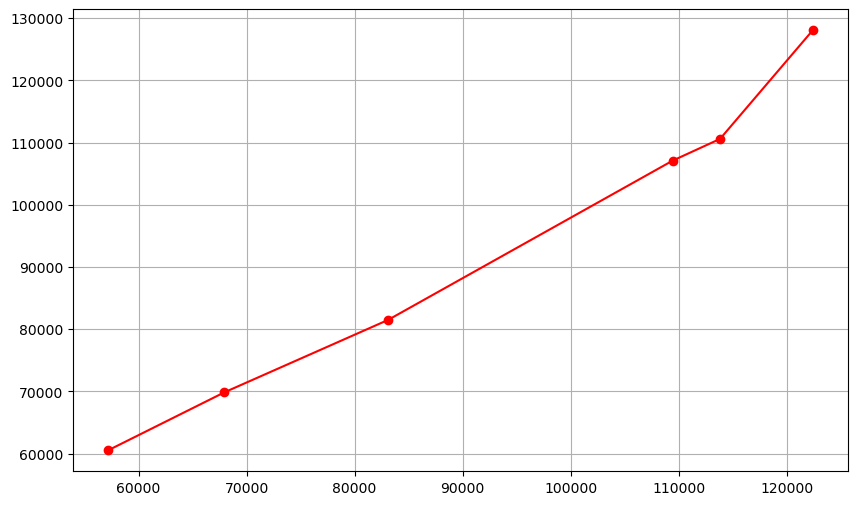

In [220]:
# Plot Line chart for actual and predicted values
plt.figure(figsize=(10,6))
plt.plot(df1['Actual Values'], df1['Predicted Values'], marker = 'o', linestyle = '-', color = 'red')
plt.grid(True)

# Display the plot
plt.show()